<a href="https://colab.research.google.com/github/alfonsomayoral/ImageColorQuantization_PythonProject/blob/main/Image_Color_Quatization_Using_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means and PCA: Implementation and Applications

##Project Overview

This project implements the **K-means clustering** algorithm and **Principal Component Analysis (PCA)** for data clustering and dimensionality reduction. We also apply these techniques to image color quantization, where K-means is used to simplify the number of colors in an image. This process can be useful for compression and artistic rendering of images.

The notebook is structured into the following sections:

1. **_Introduction and Setup_**: Overview of concepts and importing libraries.
2. **_K-means Algorithm Implementation_**: Clustering using synthetic datasets.
3. ***Evaluating K-means with SSE***: Investigating the impact of the number of clusters.
4. ***Principal Component Analysis (PCA):*** Dimensionality reduction with visualization.
5. ***Image Color Quantization using K-means:*** Simplifying image colors with clustering.
6. ***Conclusion and Insights:*** Summarizing findings and observations.





## **1. Introduction and Setup**
K-means is an unsupervised learning algorithm that partitions data into
**𝐾** clusters by minimizing the intra-cluster sum of squares (SSE). PCA is a dimensionality reduction technique that transforms data into a lower-dimensional space while preserving as much variance as possible.





In [2]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage.io import imread
from skimage.util import img_as_float
import seaborn as sns

## **2. K-means Algorithm Implementation**
Here, we generate a synthetic dataset using make_blobs and apply the K-means algorithm. The goal is to assign data points to
𝐾 clusters.

### **2.1 K-means Clustering Explication**

In this project, we first implemented the K-means algorithm as a Python function that accepts the number of clusters (K) and a dataset $\mathbf{x}_1,\mathbf{x}_2, \ldots, \mathbf{x}_N$, where each data vector $\mathbf{x}_i \in \mathbb{R}^d$. The function is designed for general \(d\), and later we apply it to a two-dimensional synthetic dataset for visualization.

### General Algorithm Description
Given training examples $\mathbf{x}_1,\mathbf{x}_2, \ldots, \mathbf{x}_N$, the K-means algorithm partitions the data into \(K\) clusters by iteratively updating the cluster assignments and centroids. The algorithm proceeds as follows:

* Initialize cluster centers $\mu_1,\ldots, \mu_K \in \mathbb{R}^d$ at random
* Repeat until convergence
  * For every data point $\mathbf{x}_i$, update its label as
  \begin{equation*}
  z_i = \text{argmin}_j \|\mathbf{x}_i - \mu_j\|_2^2.
  \end{equation*}
  
  * For each cluster $j$, update its center $\mu_j$ as mean of all points assigned to cluster $j$:
  $$ \mu_j = \dfrac{\sum_{i=1}^N \delta\{z_i = j\} \mathbf{x}_i}{\sum_{i=1}^N \delta \{z_i = j\}}.$$  
  $\delta\{z_i = j\}$ denotes an indicator function that is equal to 1 if $z_i = j$ and zero otherwise. $\sum_{i=1}^N\delta\{z_i = j\}$ indicates the number of points in $i$th cluster.

We can define sum of squared errors (SSE) as
$$ \text{SSE}  = \sum_j \sum_i \delta\{z_i = j\} \|\mathbf{x}_i - \mu_j\|_2^2$$`

The algorithm iterates until the cluster centroids stabilize or a predefined maximum number of iterations is reached.

### Objective Function
The K-means algorithm minimizes the $\textit{Sum of Squared Errors (SSE)}$, which is defined as:
$[
\text{SSE} = \sum_{j=1}^K \sum_{i=1}^N \delta\{z_i = j\} \|\mathbf{x}_i - \mu_j\|_2^2.
]$
The SSE measures the total intra-cluster variance, and a lower SSE indicates tighter clusters.

### Implementation Details
We implemented the K-means algorithm in Python using the $\texttt{KMeans}$ class from the Scikit-learn library. The function accepts the dataset, the desired number of clusters (\(K\)), and parameters for the maximum number of iterations and the number of initializations.

### Synthetic Dataset Application
To illustrate the behavior of K-means, we applied the algorithm to a two-dimensional synthetic dataset. The dataset was generated using ${make\_blobs}$, and we experimented with \(K = 2\) to \(K = 8\). The clustering results were visualized for each value of \(K\), showing how the algorithm partitions the data and updates the cluster centroids.

For each value of \(K\), the data points are colored according to their cluster assignments, and the centroids are marked with red crosses. This visualization helps in understanding how the clustering changes as \(K\) varies and the clusters evolve.

### **2.2 K-means clustering fuction**
The function below implements K-means clustering using the Scikit-learn library.

In [3]:
def k_means_clustering(data, K, max_iter=100, tol = pow(10,-3)):
  # Inputs
  #   data - N x d array
  #   K - number of clusters
  #   max_iter - maximum iterations for K-means
  #   tol - stopping parameter that checks relative change in sum of squared errors
  #
  # Outputs:
  #   labels - cluster assignment label for each data sample (N values)
  #   centroid - centroids of each cluster (K vectors)
  #   SSE_history - table of SSE record at every iteration
  #   iter - total number of iterations at stopping/convergence

  N, d = data.shape
  centroids = data[np.random.choice(N, K, replace=False)]  # Randomly select K initial centroids
  labels = np.zeros(N, dtype=int)  # Placeholder for cluster assignments
  SSE_history = []  # To store SSE values at each iteration

  for iteration in range(max_iter):
      # Step 1: Assign each point to the nearest centroid
      for i in range(N):
          distances = np.linalg.norm(data[i] - centroids, axis=1)  # Compute distances to all centroids
          labels[i] = np.argmin(distances)  # Assign to the nearest centroid

         # Step 2: Update centroids based on current cluster assignments
      new_centroids = np.zeros_like(centroids)
      for k in range(K):
          points_in_cluster = data[labels == k]
          if len(points_in_cluster) > 0:  # If cluster is not empty
              new_centroids[k] = np.mean(points_in_cluster, axis=0)
          else:  # If cluster is empty, reinitialize its centroid randomly
              new_centroids[k] = data[np.random.choice(N)]

      centroids = new_centroids

      # Step 3: Compute the Sum of Squared Errors (SSE)
      SSE = 0
      for k in range(K):
          points_in_cluster = data[labels == k]
          SSE += np.sum((points_in_cluster - centroids[k])**2)
      SSE_history.append(SSE)

      # Step 4: Check for convergence based on SSE change
      if iteration > 0 and abs(SSE_history[iteration] - SSE_history[iteration-1]) / SSE_history[iteration-1] <= tol:
          break

  return labels, centroids, SSE_history, iteration + 1

### **2.3 Implement K-means Clustering**
Here, we visualize the synthetic dataset and then apply K-means clustering for
𝐾 = 2, 3, 4, 5, 6, 7, 8. Each result is visualized to show how the clustering changes as 𝐾 increases.

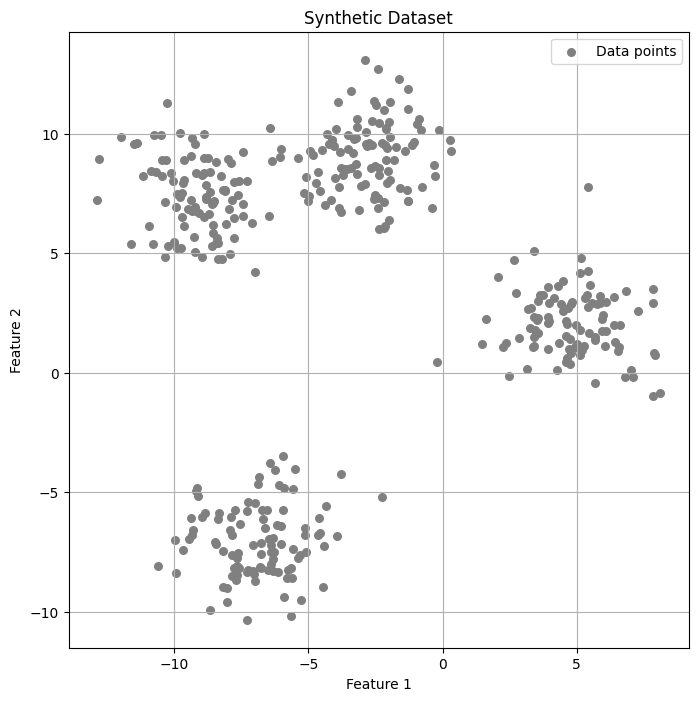

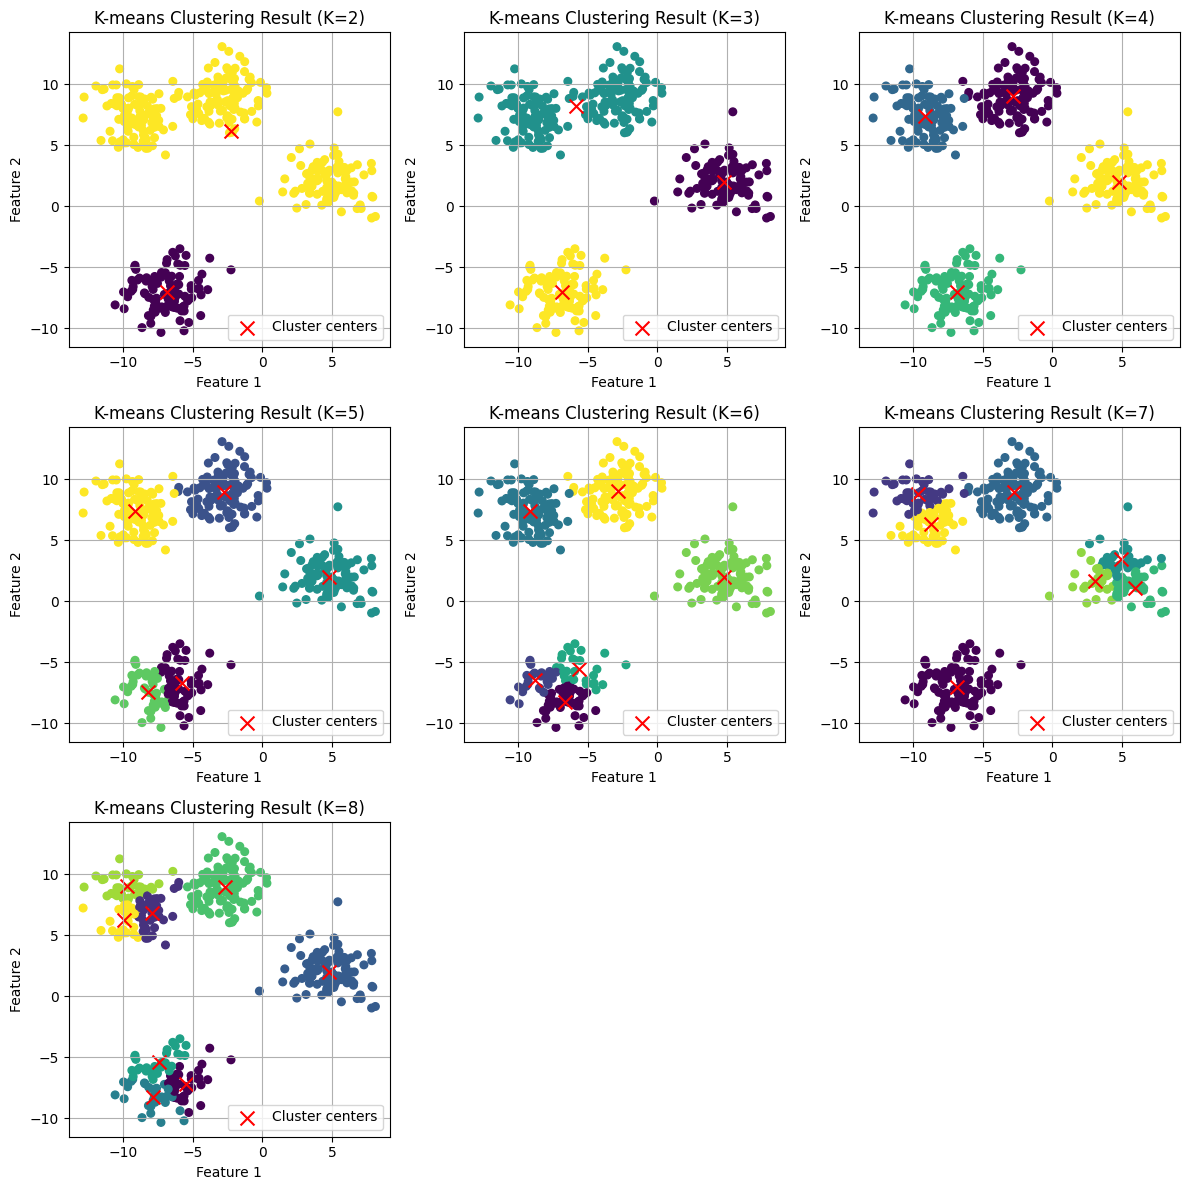

In [4]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)

# Visualize the synthetic dataset
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=30, label="Data points")
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

# Apply K-means clustering for K = 2 to K = 8
k_values = range(2, 9)

# Set up subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid to accommodate K=2 to K=8
axs = axs.ravel()

for idx, k in enumerate(k_values):
    labels, centers, SSE_history, iters = k_means_clustering(X, k)

    # Plot the clustering result
    axs[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axs[idx].scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label="Cluster centers")
    axs[idx].set_title(f"K-means Clustering Result (K={k})")
    axs[idx].set_xlabel("Feature 1")
    axs[idx].set_ylabel("Feature 2")
    axs[idx].legend()
    axs[idx].grid()

# Disable any unused subplots in the grid
for ax in axs[len(k_values):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## **3. Evaluating K-means with SSE**

To understand the impact of the number of clusters, we evaluate the Sum of Squared Errors (SSE) for varying 𝐾. A plot of SSE against 𝐾 can reveal the "elbow point," which is the optimal number of clusters.

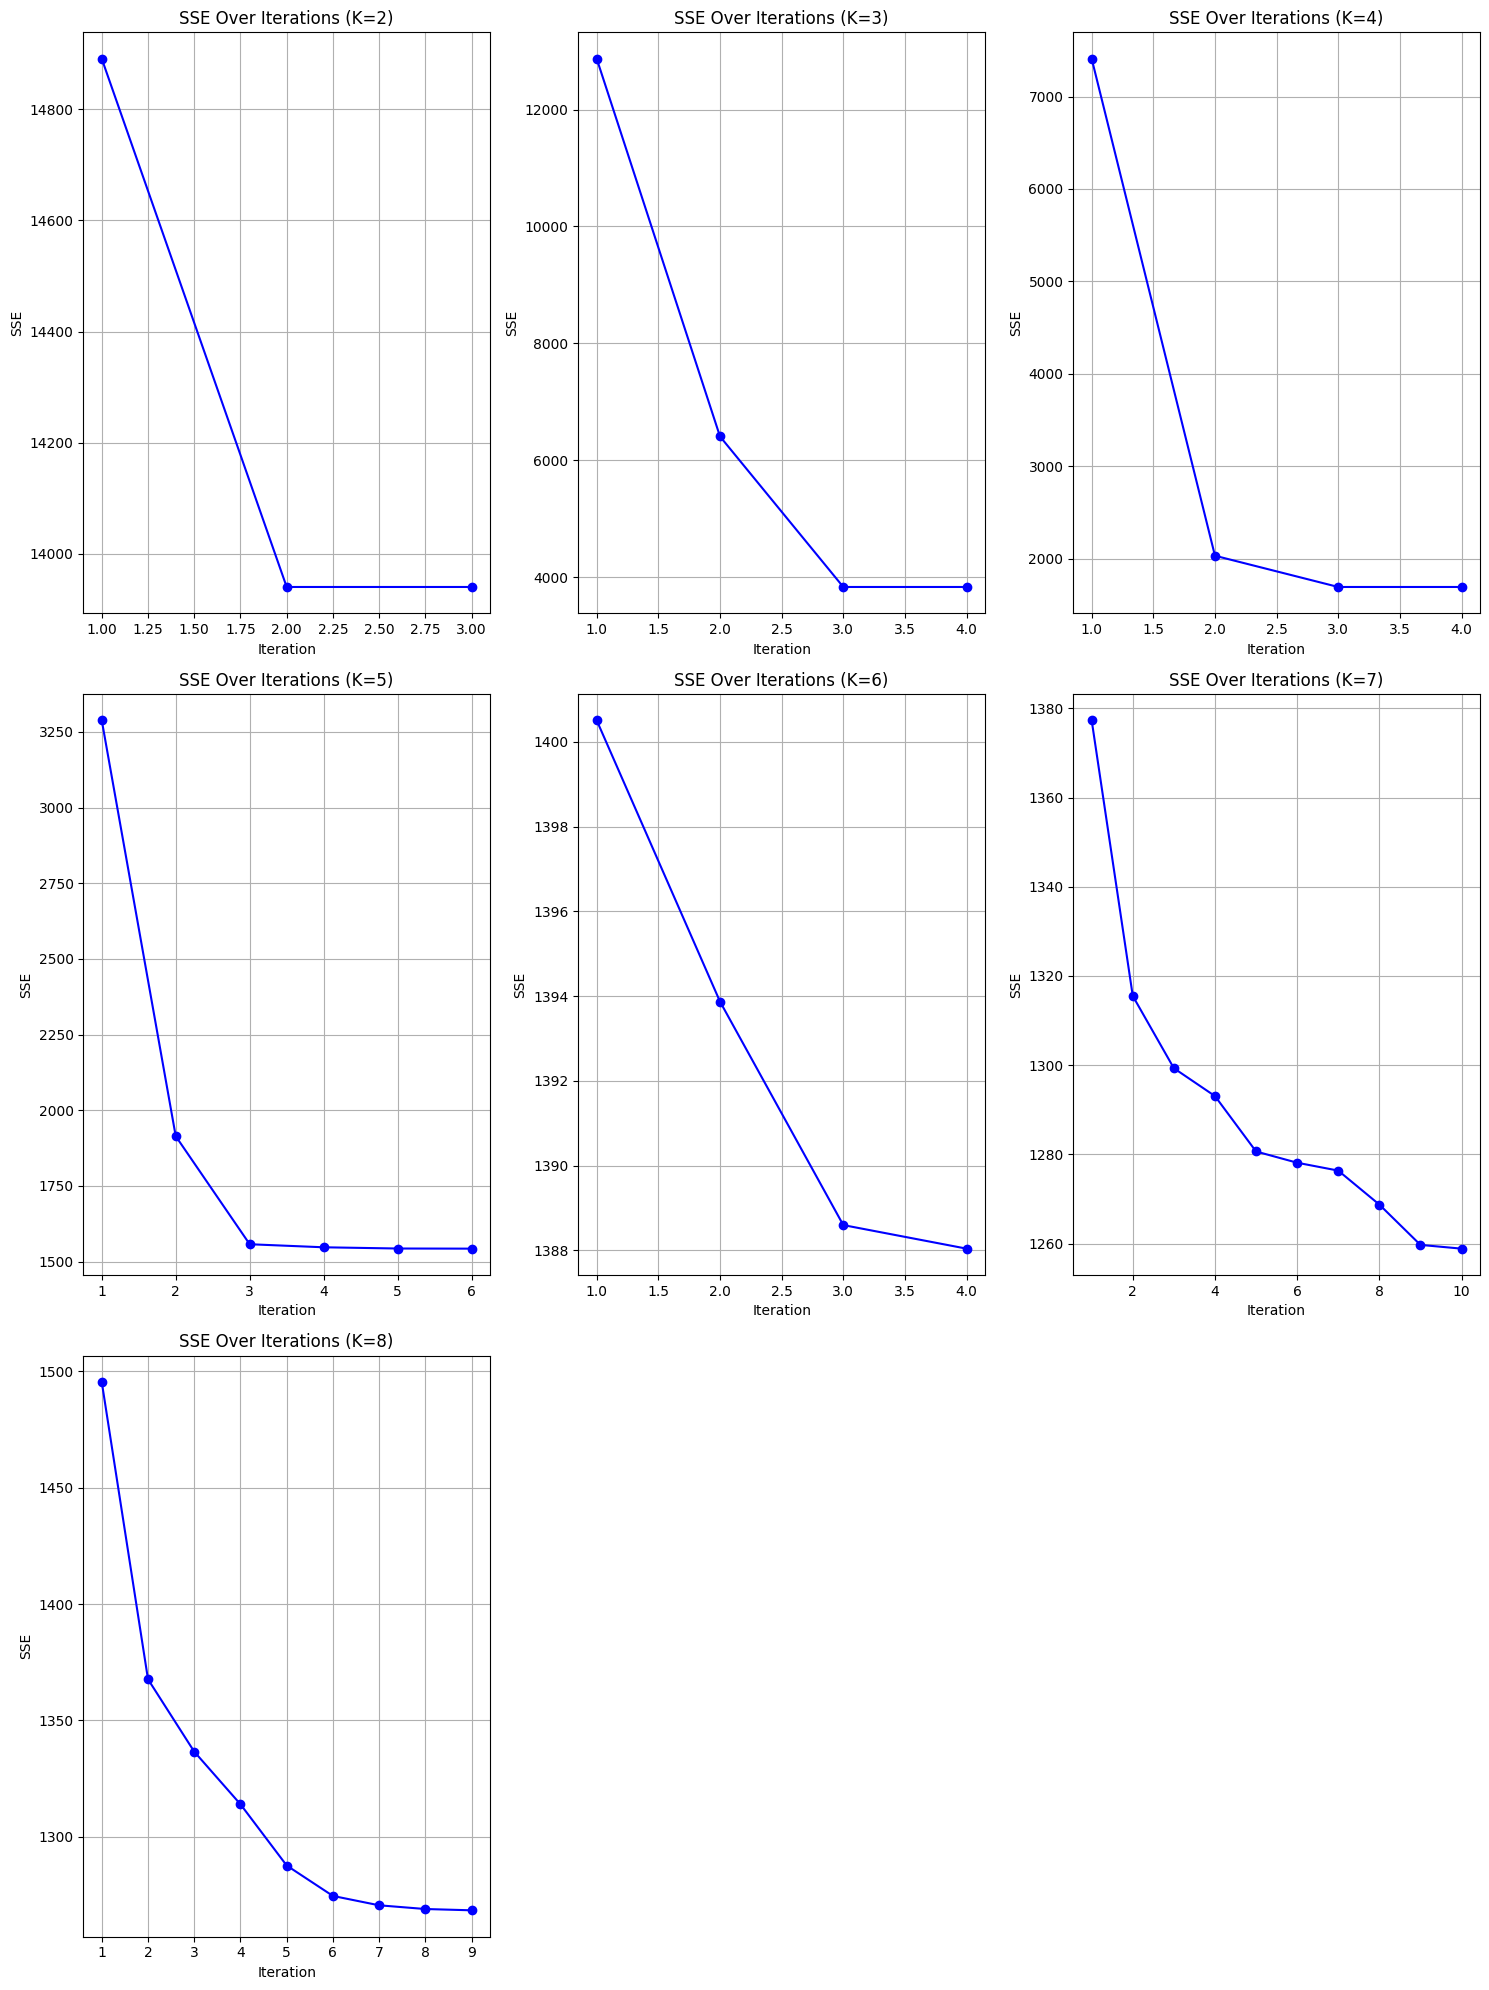

In [5]:
# Generate synthetic dataset
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)

# Evaluate SSE for K = 2 to 8 and plot SSE over iterations for each K
k_values = range(2, 9)

plt.figure(figsize=(15, 20))  # Set up the figure size

for i, K in enumerate(k_values, start=1):
    _, _, SSE_history, total_iterations = k_means_clustering(X, K)

    # Plot SSE over iterations for the current K
    plt.subplot(3, 3, i)
    plt.plot(range(1, len(SSE_history) + 1), SSE_history, marker='o', color='b')
    plt.title(f"SSE Over Iterations (K={K})", fontsize=12)
    plt.xlabel("Iteration", fontsize=10)
    plt.ylabel("SSE", fontsize=10)
    plt.grid()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

The **SSE** consistently decreases with every iteration of the K-means algorithm. This is because the algorithm optimizes the cluster centroids to minimize the sum of squared errors, and convergence occurs when SSE stops changing significantly or reaches a local minimum.

As 𝐾 increases, the SSE decreases. This is because more clusters allow for better fitting of the data, with each cluster representing fewer data points, which reduces the overall intra-cluster variance.

## **4. Image Color Quantization using K-means**

Now we will use K-means to perform segmentation/quantization on a color image.

Each pixel in a given image will be a feature vector containing 3 color components (RGB). We will first group all colors into K clusters, which will provide us a color palatte. Then we will replace the color in every pixel with one of the colors in the color palatte (that is the centroid of the cluster in which RGB value of a pixel falls).

We will use K-means script from previous step to segment an image into K clusters. To create a "quantized" output image, we will replace every pixel in the image with the center of the cluster assigned to it. To see the diferences we will report the results for K = {2, 4, 8, 16, 32, 64}  clusters.

**In order to achieve a good result, I will use a colorful photo, in this case a photo of my dog, but if you want you could try with your photo uploading it to the files section of the right with the name of "photo.JPG"**

uint8
(1572, 1179, 3)


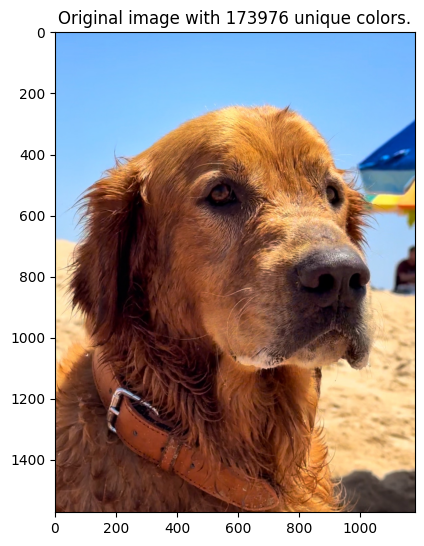

In [6]:
# load and display an image with Matplotlib
from matplotlib import image

# load image as pixel array
img = image.imread('photo.JPG')

print(img.dtype)
print(img.shape)

h, w, c = img.shape
unique_colors = np.unique(np.reshape(img,(h*w,c)),axis = 0)

plt.figure()
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.grid(False)
plt.title('Original image with {0:d} unique colors.'.format(unique_colors.shape[0]))
plt.imshow(img)
plt.show()

Before performing the clustering, we will process the image data.

1. We will crop or resize the image to a small size if the image is large. An image close to  100×100  pixels will be sufficient for this experiment.

2. We will convert 8 bit integers to floats by dividing every pixel by 255 so that we can perform floating point operations and plot the arrays as images using plt.imshow that works well on float data in the range [0-1].

Original size: (1179, 1572)
Resized size: (393, 294, 3)


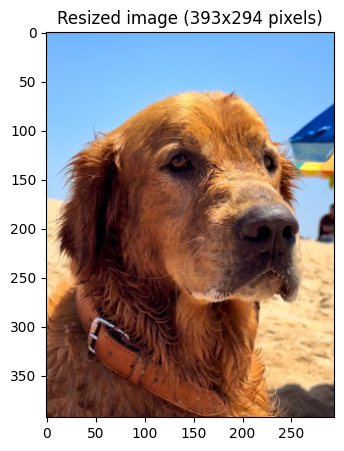

In [7]:
# Improting Image class from PIL module
from PIL import Image

img = Image.open('photo.JPG')
img_size = img.size
print(f"Original size: {img_size}")

new_size = np.asarray(img_size) // 4
img = img.resize(new_size.astype(int))
img = np.asarray(img)
print(f"Resized size: {img.shape}")

plt.figure(figsize=(5, 5))
plt.title(f"Resized image ({img.shape[0]}x{img.shape[1]} pixels)")
plt.imshow(img)
plt.grid(False)
plt.show()

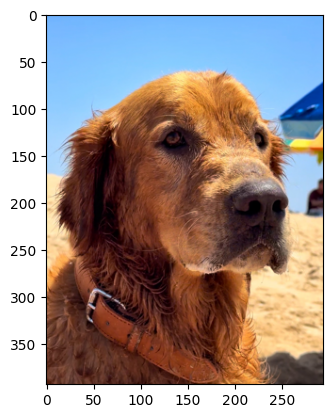

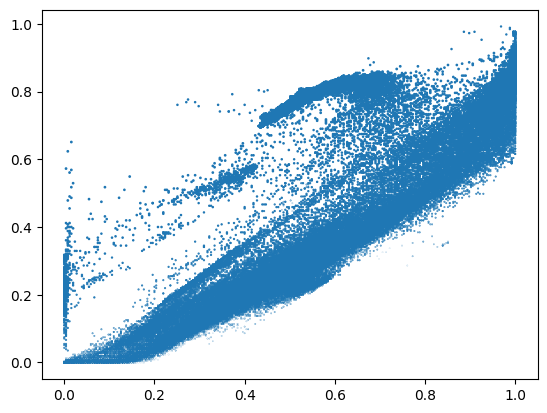

In [8]:
# Preprocessing the data for clustering
# convert to float64 in range [0,1]
if np.max(img) > 1:
  img = np.array(img, dtype=np.float64) / 255
plt.imshow(img)
plt.grid(False)

# Load Image and transform to a 2D numpy array.
h, w, c = original_shape = tuple(img.shape)
assert c == 3
data = np.reshape(img, (w * h, c))

plt.figure()
plt.scatter(data[:,0],data[:,1],data[:,2])

Now we will perform two steps.

1. K-means clustering for different values of K using the kmeans_clustering function above.

2. Replace all the colors in the original image with the centroids of the cluster each of them belong to. This will give us a "segmented/quantized image" for different values of K; let us denote each image as img_seg.

We will plot the original image and the img_seg for K = 2, 4, 8, 16, 32, 64.

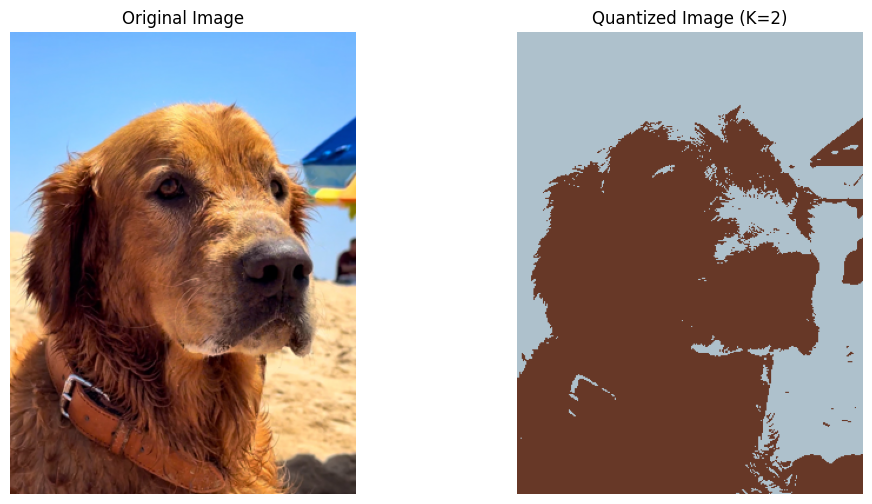

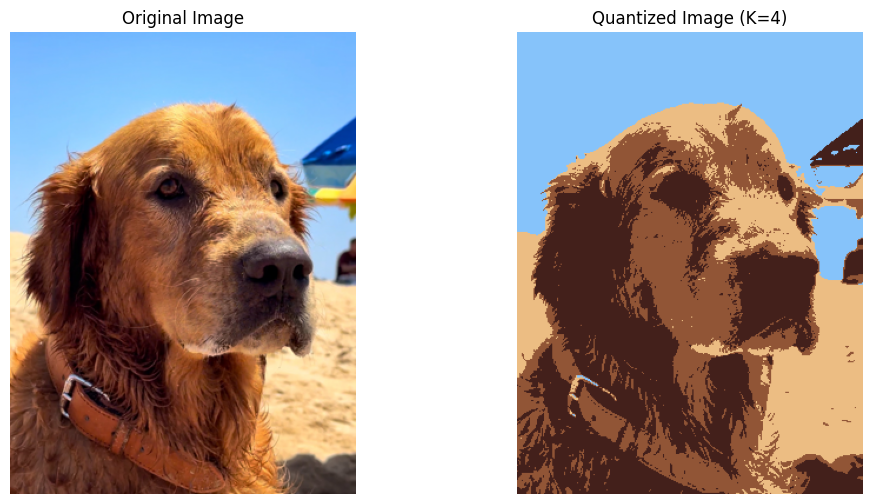

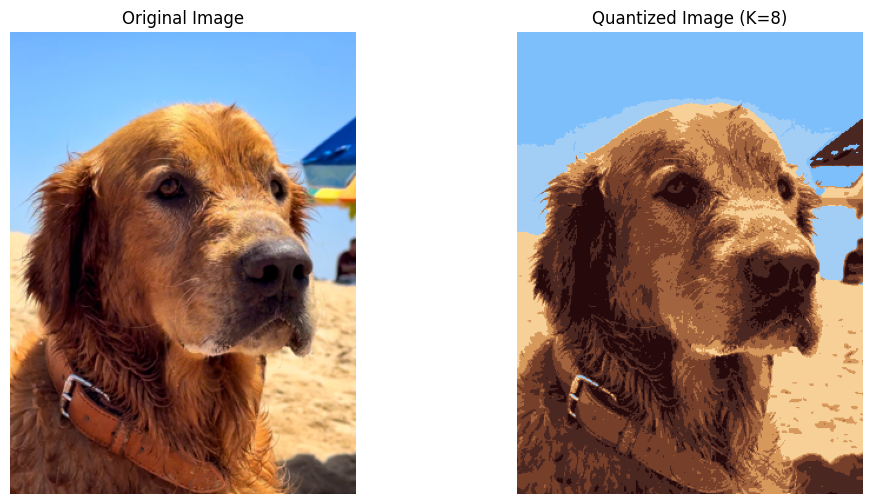

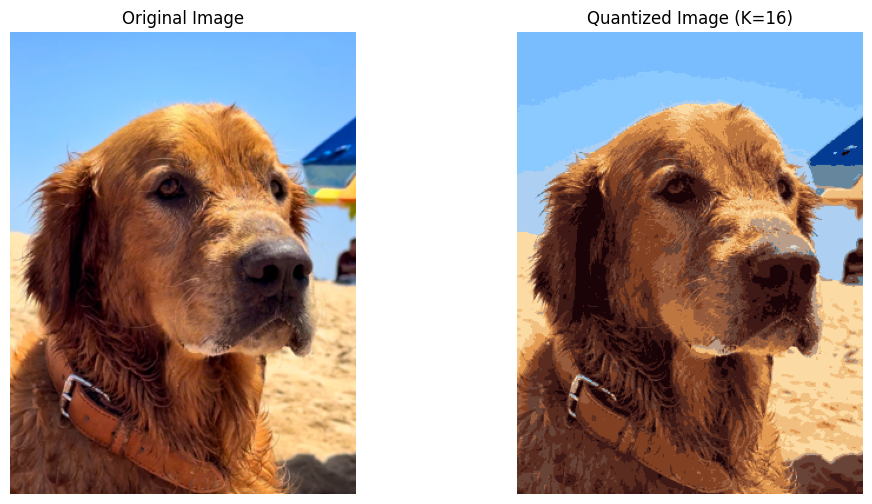

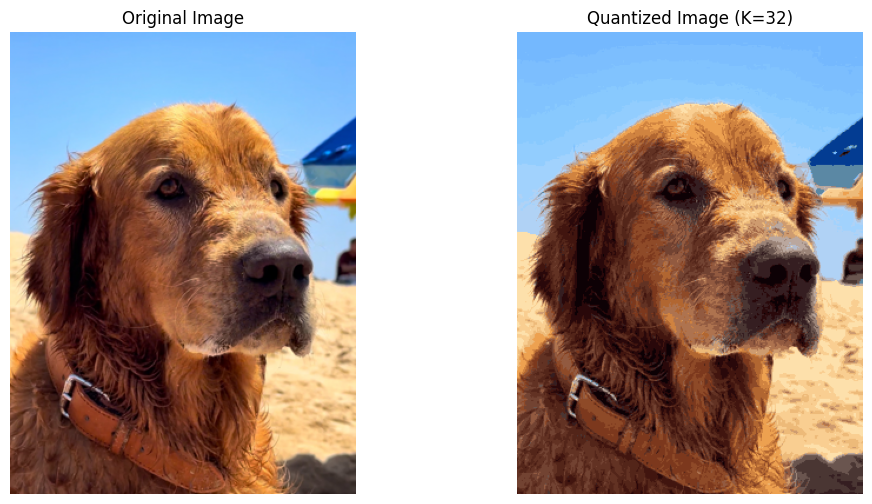

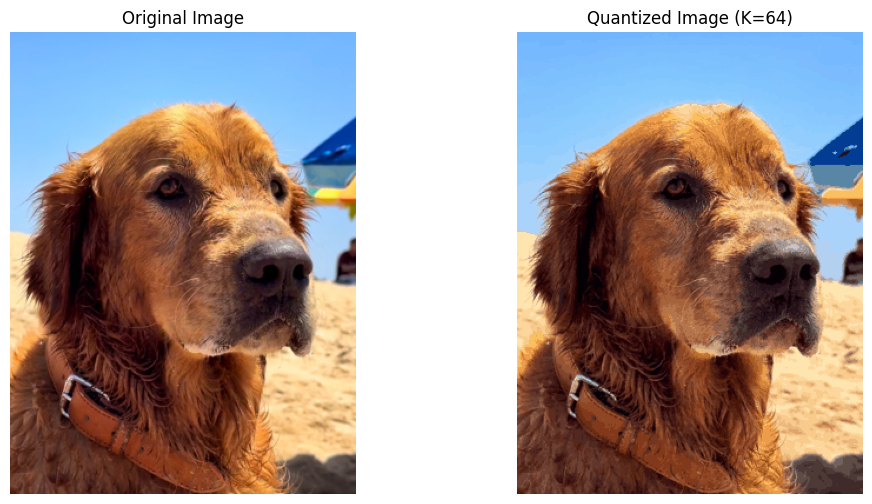

In [9]:
for K in [2, 4, 8, 16, 32, 64]:
  labels, centroids, SSE_history, iters = k_means_clustering(data,K,max_iter=100,tol=pow(10,-3))

  img_seg = centroids[labels]

  img_seg = np.reshape(img_seg, (h, w, c))

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title(f"Original Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(img_seg)
  plt.title(f"Quantized Image (K={K})")
  plt.axis('off')

  plt.show()

## **5. Principal Component Analysis (PCA)**



In this final section, we will apply **PCA** (Principal Component Analysis) to reduce the dimensionality of the RGB pixel values before performing K-means clustering. By reducing the color dimensions, we can explore how PCA affects the clustering results and the visual appearance of the quantized images.

**Dimensionality Reduction with PCA**

Principal Component Analysis (PCA) is employed to reduce the dimensionality of the image data, specifically the RGB pixel values, which exist in a 3D space. Through PCA, this data is projected into a lower-dimensional (2D) space, enabling more efficient processing. This dimensionality reduction enhances the effectiveness of subsequent clustering algorithms, such as K-means, by concentrating on the most significant variations in the image's color distribution. By focusing on these principal components, K-means clustering is better equipped to capture the core color patterns of the image.

**Reverting to the Original RGB Space**

Once the image data has been clustered in the reduced 2D PCA space, the centroids corresponding to the clusters are mapped back to the original RGB space. This is achieved through the inverse transformation of the PCA-transformed data, which restores the pixel values to their original three-dimensional color representation. This step ensures that the quantized image retains its visual coherence with respect to its original color space.

**Quantization Process**

In this process, the pixels of the image are substituted with the nearest cluster centroids, similar to traditional image quantization methods. The difference lies in the application of PCA, which modifies the clustering process by operating in the reduced, lower-dimensional space. The quantized images are then visualized for different values of K, representing the number of clusters, to illustrate the effect that PCA has on color quantization. By varying K, the impact of dimensionality reduction on the overall image quality and clustering can be analyzed.

**Visualization of Results**

To better understand the outcomes of PCA integration, the reduced pixel data is represented in a scatter plot, showing its distribution in the 2D space after PCA transformation. Additionally, a side-by-side comparison is made between the original image and the quantized images produced using PCA, allowing for a direct visual assessment of how PCA influences the image's color representation and the effectiveness of the quantization process.

**What are the Benefits of PCA Integration?**

The integration of PCA in the quantization process offers several advantages. Firstly, dimensionality reduction simplifies the clustering task, particularly in large datasets like image pixels, thereby enhancing computational efficiency. Secondly, PCA prioritizes the most prominent color variations, which may lead to more meaningful and visually appealing quantization results. Finally, comparing the quantized images with and without PCA provides valuable insights into the role of PCA in improving visual quality and refining clustering outcomes, offering a deeper understanding of its impact on the image processing pipeline.

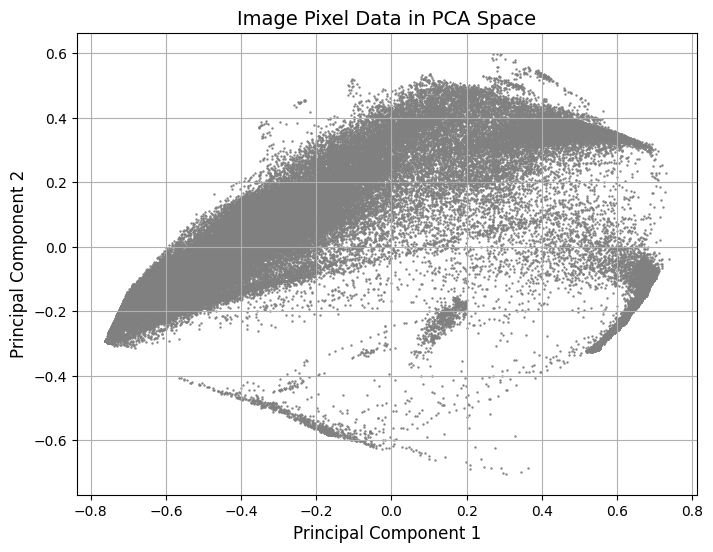

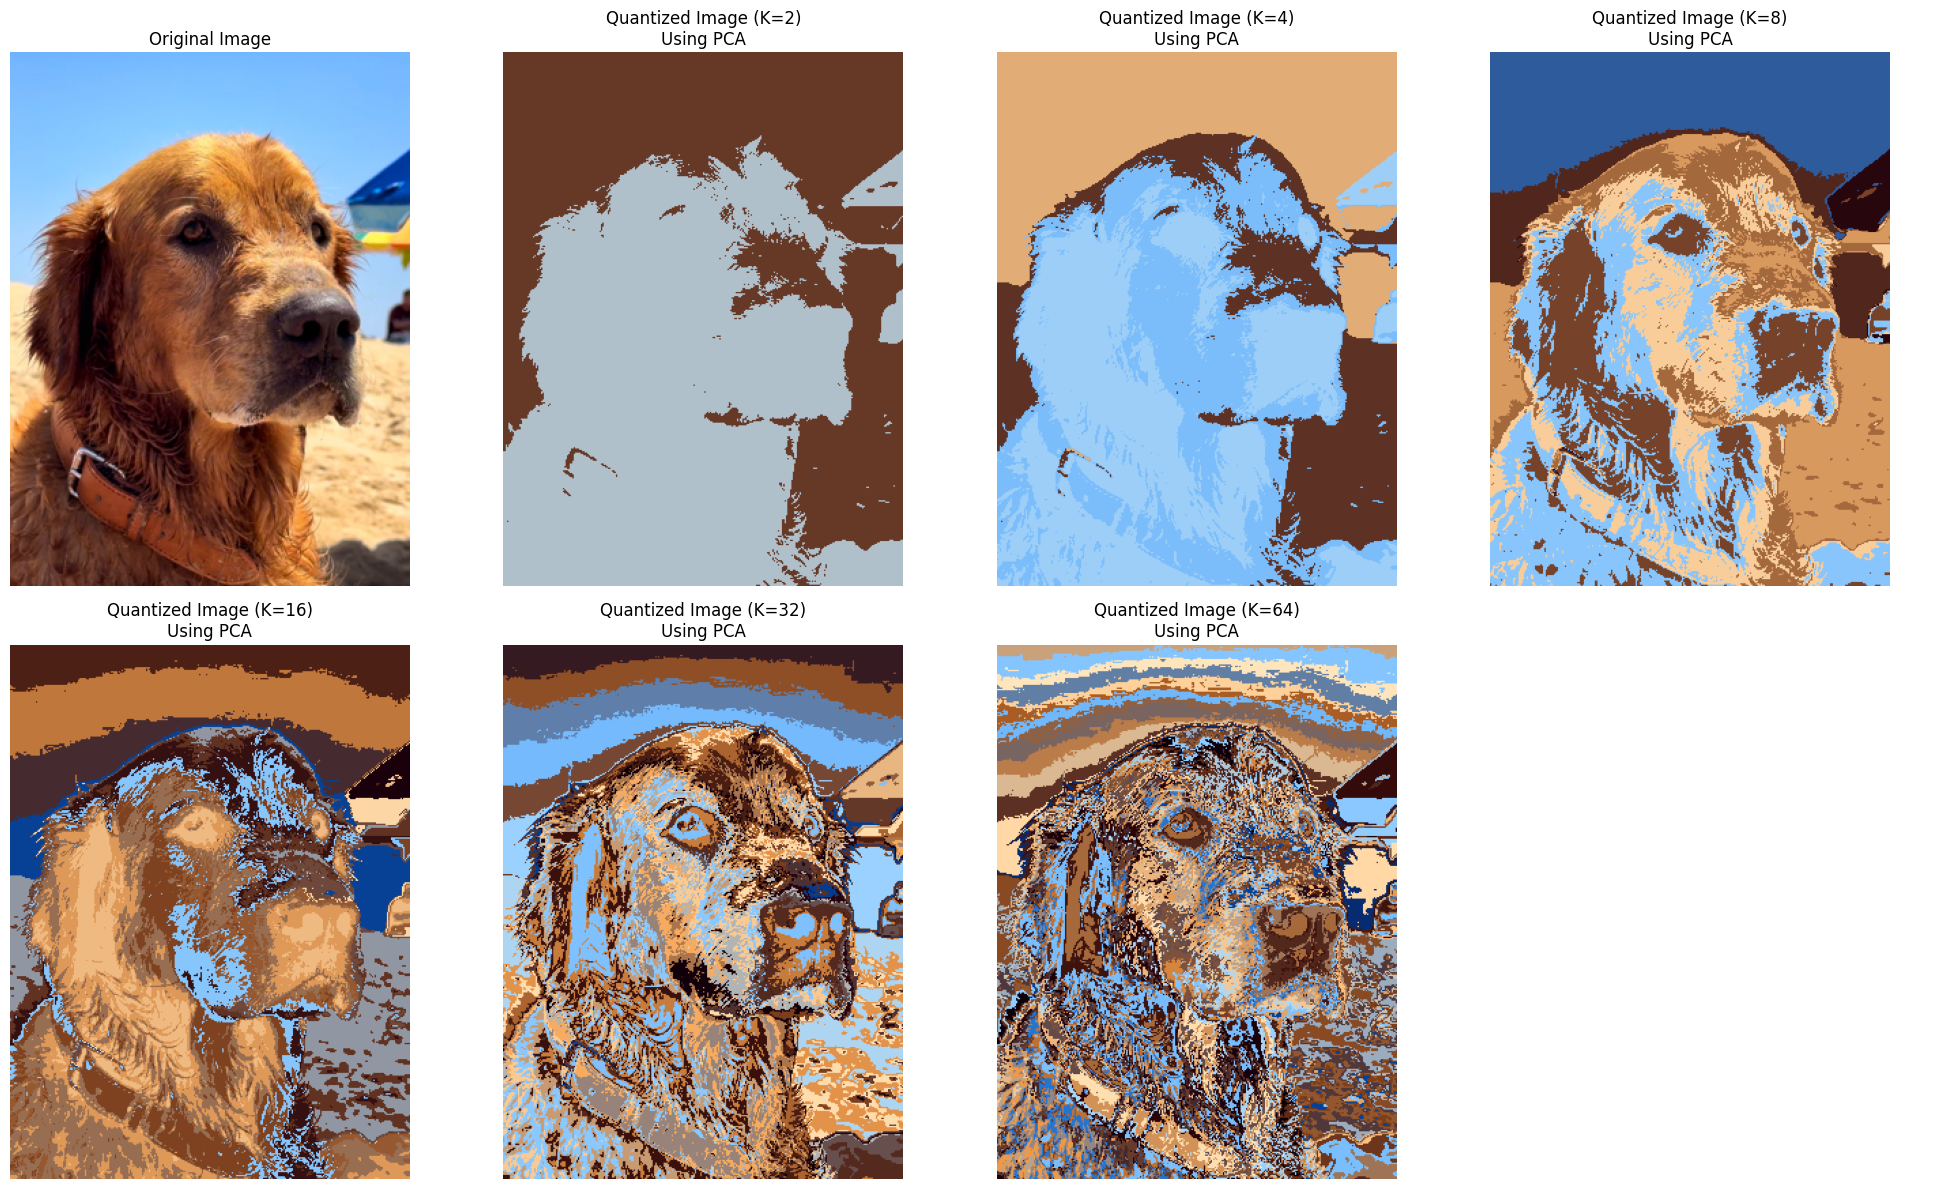

In [10]:
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np

image = img
rows, cols, channels = image.shape
X_image = image.reshape(-1, 3)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_image)

# Visualize the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=0.5, color='gray')
plt.title("Image Pixel Data in PCA Space", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid()
plt.show()

# Apply K-means clustering to PCA-reduced data for K=2 to K=64
k_values = [2, 4, 8, 16, 32, 64]
quantized_images_pca = {}

for K in k_values:
    _, centroids, _, _ = k_means_clustering(X_pca, K)  # Use the custom K-means function
    centroids_rgb = pca.inverse_transform(centroids)  # Map centroids back to RGB space
    labels, _, _, _ = k_means_clustering(X_pca, K)

    # Reshape and clip pixel values to [0, 1]
    quantized_image = centroids_rgb[labels].reshape(rows, cols, channels)
    quantized_images_pca[K] = np.clip(quantized_image, 0, 1)  # Ensure valid RGB range

# Visualize the original image and PCA-based quantized images
fig, axs = plt.subplots(2, 4, figsize=(20, 12))  # Adjust layout for 6 images in a 2x4 grid

# Original image
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image", fontsize=12)
axs[0, 0].axis('off')

# Quantized images
for i, K in enumerate(k_values):
    row, col = divmod(i + 1, 4)
    axs[row, col].imshow(quantized_images_pca[K])
    axs[row, col].set_title(f"Quantized Image (K={K})\nUsing PCA", fontsize=12)
    axs[row, col].axis('off')

# Hide unused subplots
for i in range(len(k_values) + 1, 8):  # Remaining subplots in the 2x4 grid
    row, col = divmod(i, 4)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()